# 梯度下降算法

假设我们有一个线性回归模型 $f(\mathbf{X}; \mathbf{w}) = \mathbf{X}\mathbf{w}$ <br>

其中$\mathbf{X} \in \mathbb{R}^{m \times n}; \mathbf{y} \in \mathbb{R}^{m}$; $\mathbf{w}$是模型参数. <br>

注意$\mathbf{X} = (\underbrace{[1,...,1]^T}_{m} | \mathbf{X_{samples}} )$. 即我们的样本$\mathbf{X_{samples}} \in \mathbb{R}^{m \times (n-1)} $<br>

在训练过程中我们想要最小化这个损失函数:<br>



\begin{equation}
J(\mathbf{w}) = ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

在求 $argmin_{\mathbf(w)}J(\mathbf{w})$ 时我们可以利用其显式解: <br>

\begin{equation}
(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = argmin_{\mathbf(w)}||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

但在 $\mathbf{X}^T\mathbf{X}$ 是不可逆矩阵时该方法不适应, 即$\mathbf{X}^T\mathbf{X}$是奇异矩阵时 (iff $det \mathbf{X}^T\mathbf{X} = 0$). 我们可以考虑用梯度下降方法求该问题的数值解 (numerical solution).<br><br><br>


## 梯度下降方法基于以下的观察:

如果实值函数 $F({\mathbf{x}})$在点 $\mathbf{u}$ 处可微且有定义，那么函数 $F({\mathbf{x}})$在 $\mathbf{u}$ 点沿着梯度相反的方向 $ -\nabla F({\mathbf{u}})$ 下降最快.<br>


因而，如果 $ {\mathbf{u_{new}}}={\mathbf{u}}-\alpha \nabla F({\mathbf{u}})$ 对一个足够小的数值 $ \alpha >0$ 成立，那么 $F({\mathbf{u_{new}}}) \leq F({\mathbf{u}})$ .<br><br><br>


## 例子

令 $F(\mathbf{v}) = || \mathbf{v} ||^2_2$, $\mathbf{v} \in \mathbb{R}^m$, 由于 $|| \cdot ||^2_2$ 处处可微: <br>

\begin{align}
\nabla F(\mathbf{v}) & = \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = \Bigg[ \frac{\partial }{\partial \mathbf{v_1}} F(\mathbf{v}),  \frac{\partial }{\partial \mathbf{v_2}} F(\mathbf{v}), ..., \frac{\partial }{\partial \mathbf{v_n}} F(\mathbf{v})\Bigg]^T
\end{align}<br>

\begin{align}
\frac{\partial }{\partial \mathbf{v_i}} F(\mathbf{v}) & = \frac{\partial }{\partial \mathbf{v_i}} ||\mathbf{v}||^2_2 \\
& = \frac{\partial }{\partial \mathbf{v_i}} \sum_{k=1}^{m} \mathbf{v_k^2} \\
& = 0+0+...+2\mathbf{v_i}+0 \\
& = 2\mathbf{v_i}\\
\end{align} <br>

\begin{equation}
\nabla F(\mathbf{v}) = \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = 2\mathbf{v}
\end{equation}<br>

## 回到回归问题:

我们的损失函数 $J(\cdot)$ 只和模型参数 $\mathbf{w}$ 有关, 因为在计算损失时 $\mathbf{X}$ 和 $\mathbf{y}$是已知的, 我们需要通过调整$\mathbf{w}$ 来优化模型<br>

\begin{equation}
J(\mathbf{w}) = ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

我们可以考虑使用梯度下降法, $\alpha$ 是一个参数 <br>

\begin{equation}
\mathbf{w_{new}} = \mathbf{w_{old}} -\alpha \nabla J({\mathbf{w_{old}}})
\end{equation} <br>

其中 <br>

\begin{equation}
\nabla J(\mathbf{w}) = \Bigg[ \frac{\partial }{\partial \mathbf{w_1}} J(\mathbf{w}),  \frac{\partial }{\partial \mathbf{w_2}} J(\mathbf{w}), ..., \frac{\partial }{\partial \mathbf{w_n}} J(\mathbf{w}) \Bigg] ^ T
\end{equation}<br><br>


对于$\mathbf{w}$的每一个元素 <br>


\begin{align}
\frac{\partial }{\partial \mathbf{w_i}} J(\mathbf{w}) & = \frac{\partial }{\partial \mathbf{w_i}} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2  \\
& = \frac{\partial }{\partial \mathbf{w_i}}  F(G(\mathbf{w}))\\
& =  \frac{\partial }{\partial G} F(G(\mathbf{w})) \cdot  \frac{\partial }{\partial \mathbf{w_i}}  G(\mathbf{w}) \\
& \\
& = 2 G(\mathbf{w}) \cdot  \mathbf{X_{:,i}} \\
& \\
& = 2 (\mathbf{X}\mathbf{w} - \mathbf{y}) \cdot \mathbf{X_{:,i}} \\
& \\
& \\
 F(\mathbf{v}) &= ||\mathbf{v}||^2_2  \quad \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = 2\mathbf{v} \\
 G(\mathbf{w}) & = \mathbf{X}\mathbf{w} - \mathbf{y} \quad  \frac{\partial }{\partial \mathbf{w_i}} G(\mathbf{w}) = \mathbf{X_{:,i}}
& \\
& \\
\end{align} 
<br><br>

所以 <br>

\begin{equation}
\nabla J(\mathbf{w}) = 2 (\mathbf{X}\mathbf{w} - \mathbf{y}) \cdot  \mathbf{X}
\end{equation}<br><br>


那么模型中$\mathbf{w}$可以由梯度下降法搜索得到: ($\alpha$ 是一个参数) <br><br>

\begin{align}
\mathbf{w_{new}} & = \mathbf{w_{old}} - 2 \alpha (\mathbf{X}\mathbf{w_{old}} - \mathbf{y}) \cdot \mathbf{X} \\
&\\
& = \mathbf{w_{old}} - 2 \alpha (\mathbf{y_{(\text{predicted on }X)}} - \mathbf{y}) \cdot \mathbf{X}
\end{align} <br>


## 迭代计算

我们可以使用迭代的方式来计算梯度并更新 $\mathbf{w_{new}}$ 即:<br>
`
n_iters = 1000
w = [1,1,1]
for i in range(n_iters):
    w = w - 2 * alpha * gradient_of_J(w)
`

完成下面的 `gradient_descent`函数

In [18]:
import numpy as np
from sklearn.metrics import r2_score

class MyLinearRegression:
    def __init__(self):
        self.w = None

    @staticmethod
    def ones_augment_to_left(X):
        X = np.array(X)
        ones = np.ones(X.shape[0])
        return np.column_stack([ones, X])
    
    @staticmethod
    def gradient_descent(X, y, n_iters=1000, 
                         alpha=0.05, 
                         weight=None, 
                         debug=False):
        w = weight
        if w is None:
            w = np.ones(X.shape[1])
        pass
        
        ###### write your code below ######
        for i in range(n_iters):
            y_pred = X.dot(w)
            error = y_pred - y
            num_of_samples = X.shape[0]
            grad = error.dot(X)/num_of_samples
            w = w - alpha *  grad # update
                
        ###### write your code above ######
        
        return w
    
    @staticmethod
    def closed_form(X ,y):
        product = np.dot(X.T, X)
        theInverse = np.linalg.inv(product)
        return np.dot(np.dot(theInverse, X.T), y)
    
    
    def fit(self, X_train, y_train, method='closed form', **kwargs):
        X = self.ones_augment_to_left(X_train)
        y = np.array(y_train)
        
        if method=='closed form':
            self.w = self.closed_form(X ,y)
        elif method == 'gradient descent':
            self.w = self.gradient_descent(X, y, **kwargs)
        return self

    
    def predict(self, X_test):
        X_test = np.array(X_test)
        augX_test = self.ones_augment_to_left(X_test)
        return augX_test.dot(self.w)
    
# 测试
import numpy as np

mlr = MyLinearRegression()

X = np.array([[1, 5], [3, 2], [6, 1]])
y = np.array([2, 3, 4])
y_pred = mlr.fit(X, y, method='gradient descent', 
                 n_iters=1000, 
                 alpha=0.05).predict(X)
print('fitted w is \t', mlr.w)
print('expected w is \t [ 2.42857143  0.28571429 -0.14285714]')
print('Am I correct? \t', np.isclose(y, y_pred, atol=1e-2).all())
print('training MSE=%.2f MAE=%.2f r^2=%.4f'% (
        np.linalg.norm(y_pred - y),
        np.linalg.norm(y_pred - y, ord=1),
        r2_score(y_pred, y)
    ))

fitted w is 	 [ 1.61599246  0.40790688  0.00479753]
expected w is 	 [ 2.42857143  0.28571429 -0.14285714]
Am I correct? 	 False
training MSE=0.17 MAE=0.27 r^2=0.9857


# 回归过程可视化

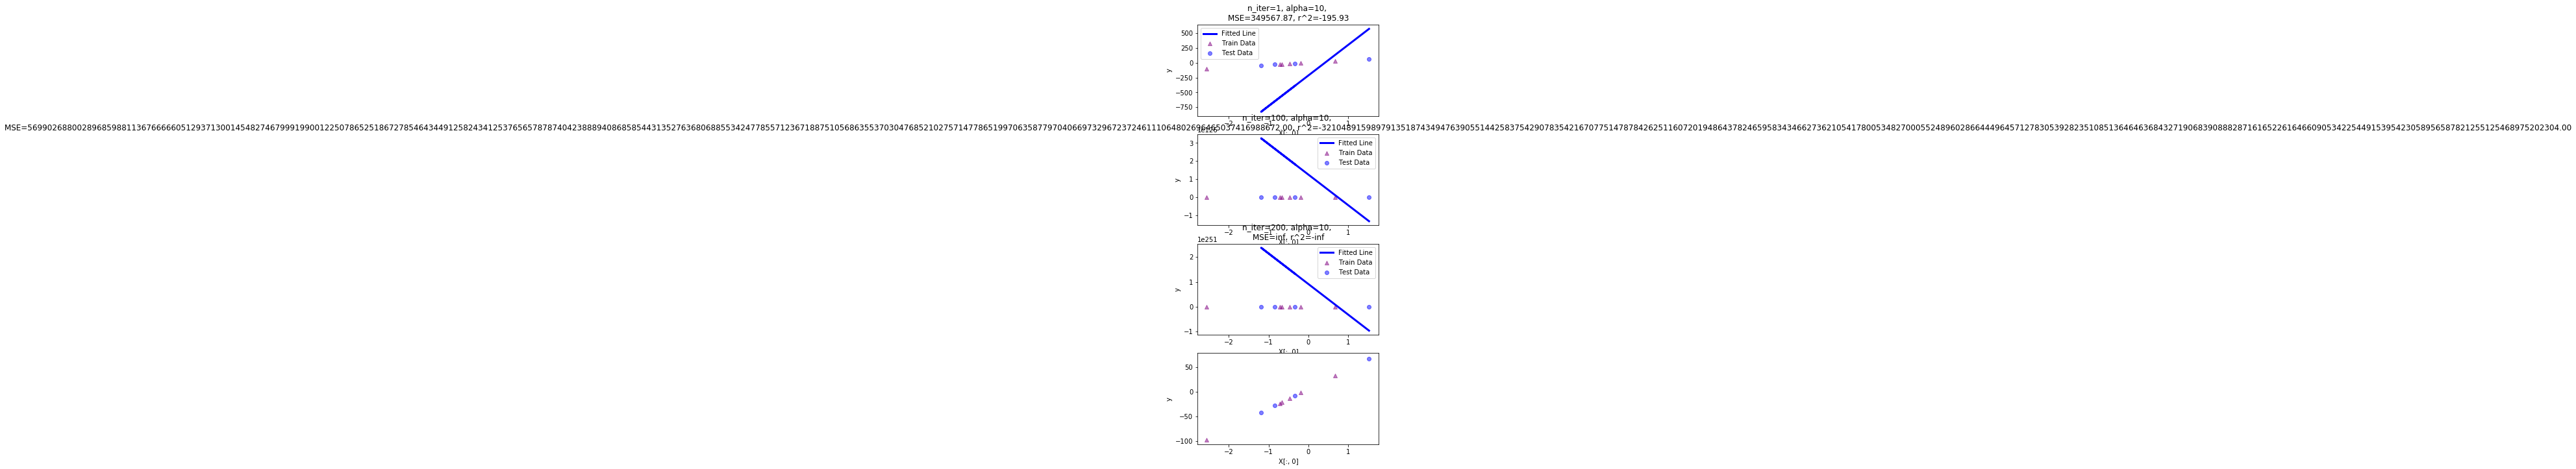

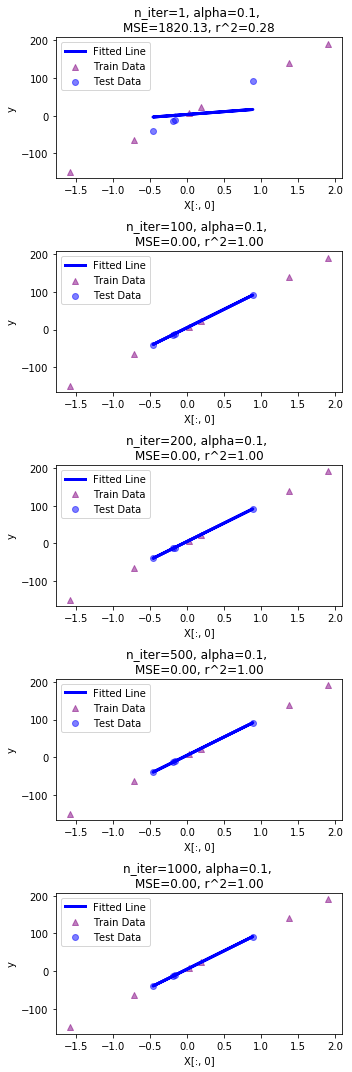

In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y, true_coef = datasets.make_regression(n_samples=10, 
                       n_features=1, 
                       n_informative=1, 
                       bias=5, 
                       coef=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

alpha = 0.1
fig = plt.figure(figsize=(5,15))
for i, n in enumerate([1, 100, 200, 500, 1000]):
    y_pred = MyLinearRegression().fit(
        X_train, y_train, 
        n_iters=n, 
        alpha=alpha, 
        method='gradient descent').predict(X_test)
    
    ax = fig.add_subplot(5, 1, i+1)
    
    ax.set_xlabel('X[:, 0]')
    
    ax.set_ylabel('y')
    
    ax.scatter(X_train[:, 0], y_train, 
               color='purple', marker='^', 
               alpha=0.5, label='Train Data')
    
    ax.scatter(X_test[:, 0], y_test, 
               color='blue', 
               alpha=0.5, label='Test Data')
    
    ax.plot(X_test[:, 0], y_pred, 
            color='blue', 
            linewidth=3, label='Fitted Line')
    
    ax.set_title('n_iter=%s, alpha=%s, \nMSE=%.2f, r^2=%.2f'% (
                n, alpha,
                mean_squared_error(y_test, y_pred), 
                r2_score(y_test, y_pred)
                )
            )
    ax.legend()

fig.tight_layout()
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import animation, rc
from IPython.display import HTML

last_weight = None

def animated_regression(X, y, 
                        true_coef=None, 
                        true_bias = None, 
                        alpha = 0.02, 
                        n_iters=1000):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=42)
    
    # close all matplotlib output
    plt.close('all')

    
    # 新建一个figure, 视频基于figure
    fig, ax = plt.subplots(figsize=(6,4.5), dpi=100)

    # 代表回归模型的直线
    line, = ax.plot([], [], 
                color='blue', 
                linewidth=3, label='Fitted Line')

    # 视频的背景
    def init():
        line.set_data([], [])
        ax.scatter(X_train[:, 0], y_train, 
                   color='purple', marker='^', 
                   alpha=0.5, label='Train Data')

        ax.scatter(X_test[:, 0], y_test, 
                   color='blue', 
                   alpha=0.5, label='Test Data')
        ax.set_title('\n'.join(np.arange(5).astype(str)))
        fig.tight_layout()
        return (line,)


    
    
    
    
    # 视频的每一帧
    def animate(i):
        global last_weight
        n_iters = i
        mlr = MyLinearRegression()
        
        # 每次回归继续使用上次回归的权重, 只迭代一次
        # weight 为 None 时fit方法会自动初始化权重
        mlr.fit(X_train, y_train, 
                n_iters=1, 
                alpha=alpha, 
                method='gradient descent', 
                weight=last_weight)
        
        # 将本次权重设为 "上次回归的权重"
        last_weight = mlr.w
        
        y_pred = mlr.predict(X_test)
        y_train_pred = mlr.predict(X_train)


        line.set_data(X_test[:, 0], y_pred)

        axtitle = []
        
        axtitle.append('n_iter=%s, alpha=%s' % (n_iters, alpha))
        axtitle.append('model w=%s' % (mlr.w ))
        
        if not (true_bias is None or true_coef is None):
            axtitle.append('true w=[%s, %s]' % (true_bias, true_coef))
            
        axtitle.append('training MSE=%.2f MAE=%.2f r^2=%.4f'% (
            np.linalg.norm(y_train - y_train_pred),
            np.linalg.norm(y_train - y_train_pred, ord=1),
            r2_score(y_train, y_train_pred)
        ))
        axtitle.append('testing MSE=%.2f MAE=%.2f r^2=%.4f' % (
                mean_squared_error(y_test, y_pred), 
                mean_absolute_error(y_test, y_pred), 
                r2_score(y_test, y_pred)))
        ax.set_title('\n'.join(axtitle))
        return (line,)


    # call the animator. blit=True means only re-draw the parts 
    # that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=n_iters, interval=20, blit=True)
    ax.legend()
    return HTML(anim.to_html5_video())

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

true_bias = 5
alpha = 0.02


X, y, true_coef = datasets.make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       bias=true_bias,
                       noise=5.0,
                       coef=True)


animated_regression(X, y, 
                        true_coef = true_coef, 
                        true_bias = true_bias, 
                        alpha = 0.02, 
                        n_iters=1000)

# 线性回归目标函数的显式解

在求 $argmin_{\mathbf(w)}J(\mathbf{w})$ 时我们可以利用其显式解: <br>

\begin{equation}
(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = argmin_{\mathbf(w)}||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

但在 $\mathbf{X}^T\mathbf{X}$ 是不可逆矩阵时该方法不适应, 即$\mathbf{X}^T\mathbf{X}$是奇异矩阵(singular matrix)时 (iff $det \mathbf{X}^T\mathbf{X} = 0$).

In [40]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
X[:, 0] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

$det \mathbf{X}^T\mathbf{X} = 0$

In [32]:
print(np.linalg.det(X_train.T.dot(X_train)))

0.0


In [34]:
import time
start_time = time.perf_counter()

mlr = MyLinearRegression()
alpha=0.5
n_iters=1000
mlr.fit(X_train, y_train, 
        n_iters=n_iters, alpha=alpha, 
        method='gradient descent')

y_pred = mlr.predict(X_test)

print('gradient descent, n_iter=%s, alpha=%s, \nMSE=%.2f, r^2=%.2f'% (
                n_iters, alpha,
                mean_squared_error(y_test, y_pred), 
                r2_score(y_test, y_pred)))

elapsed = time.perf_counter() - start_time
print('time elapsed %s seconds' % elapsed)

gradient descent, n_iter=1000, alpha=0.5, 
MSE=2773.90, r^2=0.52
time elapsed 0.009402296213018246 seconds


会报错, 输出`LinAlgError: Singular matrix`

In [35]:
mlr = MyLinearRegression()

try:
    mlr.fit(X_train, y_train, method='closed form')
except np.linalg.LinAlgError:
    print('You will get \'LinAlgError: Singular matrix\' without try and except')
    print('and your model will not fit')

You will get 'LinAlgError: Singular matrix' without try and except
and your model will not fit


In [45]:
import pandas as pd
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,0.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.0,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,0.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,0.0,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,0.0,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.0,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.0,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,0.0,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


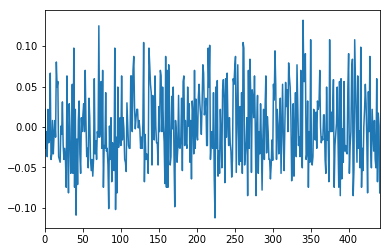

In [58]:
df[3].plot()
plt.show()

# 使用线性回归解决分类问题 (误)

In [36]:
import numpy as np
from sklearn import datasets

true_bias = 5
alpha = 0.02


iris = datasets.load_iris()
X, y = iris.data, iris.target

X = X[y <= 1]
X = X[:,[0]]
y = y[y <= 1]

animated_regression(X, y, 
                        true_coef = None, 
                        true_bias = None, 
                        alpha = 0.02, 
                        n_iters=1000)

# Logistic Regression 逻辑回归

与线性回归非常相似, 但


Sigmoid 函数:

\begin{align}
\sigma(x) & = \frac{1}{1 - e^{-x}} = \frac{e^{x}}{1 + e^{x}}\\
&\\
\sigma(x) &  \in (0,1) 
\end{align} <br><br><br>


Sigmoid 函数的微分:

\begin{align}
\frac{\mathrm{d}}{\mathrm{d} x} \sigma(x) & = \frac{e^{x}}{(1 + e^{x})^2} = \sigma(x) \cdot (1 - \sigma(x))
\end{align} <br><br><br>

逻辑回归模型:

\begin{equation}
f(\mathbf{X}; \mathbf{w})  = \frac{1}{1 - e^{-\mathbf{X}\mathbf{w}}}\\
\quad\\
f(\mathbf{X}; \mathbf{w}) \in (0,1)
\end{equation} <br><br><br>

逻辑回归模型的目标函数:

\begin{equation}
J(\mathbf{w})  = ||\frac{1}{1 - e^{-\mathbf{X}\mathbf{w}}} - \mathbf{y}||^2_2\\
\mathbf{y} \in \{0, 1\}^m
\end{equation} <br><br><br>



逻辑回归模型的目标函数的梯度:

\begin{equation}
\nabla J(\mathbf{w}) = 2 (\mathbf{X}\mathbf{w} - \mathbf{y}) \cdot  \mathbf{X}\\
\mathbf{y} \in \{0, 1\}
\end{equation}<br><br><br>
<br><br>


In [74]:
import numpy as np
from sklearn.metrics import accuracy_score


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ones_augment_to_left(X):
    X = np.array(X)
    ones = np.ones(X.shape[0])
    return np.column_stack([ones, X])


def prediction(X_test, w):
    return np.round(sigmoid(
        ones_augment_to_left(X_test).dot(w)))


def logistic_regression(X_train, y_train, n_iters=1000, alpha=0.05, weight=None):
    X = ones_augment_to_left(X_train)
    y = np.array(y_train)
    
    w = weight
    if w is None:
        w = np.ones(X.shape[1])
    pass

    for i in range(n_iters):
        scores = X.dot(w)
        y_pred = sigmoid(scores)
        error = y_pred - y
        grad = error.dot(X) / X.shape[0]
        
        w = w - alpha *  grad # update

        if i % (n_iters//10) == 0:
            print('iter:%d \taccuracy=%.3f'%(
                i, accuracy_score(y, np.round(y_pred))
                )
            )
            
    return w


from sklearn import datasets
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression



iris = datasets.load_iris()
X, y = iris.data, iris.target

X = X[y <= 1]
y = y[y <= 1]
print(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# clf = LogisticRegression(fit_intercept=True)
# clf.fit(X_train, y_train)

w = logistic_regression(X_train, y_train)

# print(clf.intercept_, clf.coef_)
print(w)


# y_pred = logit_reg(X_train, y_train, X_test)
# print(y_pred)


# mlr = MyLogisticRegression()
# mlr.fit(X_train, y_train)
# y_pred = mlr.predict(X_test)

y_pred = prediction(X_test, w)
'test accuracy', accuracy_score(y_test, y_pred)

[0 1]
iter:0 	accuracy=0.537
iter:100 	accuracy=1.000
iter:200 	accuracy=1.000
iter:300 	accuracy=1.000
iter:400 	accuracy=1.000
iter:500 	accuracy=1.000
iter:600 	accuracy=1.000
iter:700 	accuracy=1.000
iter:800 	accuracy=1.000
iter:900 	accuracy=1.000
[ 0.44660708 -0.84973254 -1.40703177  2.61777075  1.82475979]


('test accuracy', 1.0)

In [72]:
np.round(sigmoid(ones_augment_to_left(X_test).dot(w)))

array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.])

iter:0 	accuracy=0.500
iter:100 	accuracy=0.990
iter:200 	accuracy=0.990
iter:300 	accuracy=0.990
iter:400 	accuracy=0.990
iter:500 	accuracy=0.990
iter:600 	accuracy=0.990
iter:700 	accuracy=0.990
iter:800 	accuracy=0.990
iter:900 	accuracy=0.990


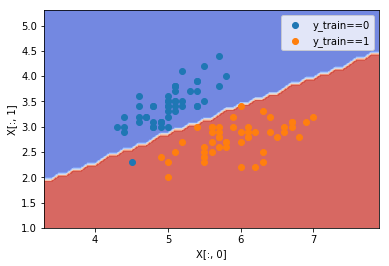

In [65]:
from matplotlib import pyplot as plt

def plot_bounds2D(X, y):
    # create all pari-wise combinations of
    # x0's possible values and x1's possible values
    #
    # read here for more details:
    # https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python

    d0_possible_values = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1)
    d1_possible_values = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1)

    d0, d1 = np.meshgrid(d0_possible_values, d1_possible_values)

    # create data set with d0 and d1 as two columns
    dots = np.c_[d0.ravel(), d1.ravel()]

    # num. rows = 1, num. cols = 1, plotting 1st subplot
    plt.subplot(1, 1, 1)

    plt.subplots_adjust(wspace=0.6, hspace=0.4)
    w = logistic_regression(X[:, [0, 1]], y)
    dots_predicted = prediction(dots, w)
    
    # convert possible string labels to numerical label for plotting
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(dots_predicted)
    coloured_dots = le.transform(dots_predicted)
    
    # Put the result into a color plot
    coloured_dots = coloured_dots.reshape(d0.shape)
    
    plt.contourf(d0, d1, coloured_dots, cmap=plt.cm.coolwarm, alpha=0.8)
#     plt.pcolormesh(d0, d1, coloured_dots, cmap=plt.cm.coolwarm)

    # Plot also the training points
    plt.xlim(d0.min(), d0.max())
    plt.ylim(d1.min(), d1.max())

    # plot the line, the points, and the nearest vectors to the plane
    plt.xlabel('X[:, 0]')
    plt.ylabel('X[:, 1]')

    for yy in np.unique(y):
        plt.scatter(x=X[:, 0][y == yy], y=X[:, 1][y == yy], label='y_train==' + str(yy))
    plt.legend()
    
from matplotlib import pyplot as plt
plot_bounds2D(X[:,[0,1]], y)
plt.show()